In [87]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import pandas.api.types as ptypes
import seaborn as sns

SESSION_YEAR = 2024
SESSION_NAME = 'Sao Paulo'
SESSION_TYPE = 'R'

# Grand Prix Data

## Get Season and sessions

In [88]:
schedule = fastf1.get_event_schedule(SESSION_YEAR)
print(schedule)

sessions = []
# Filter out testing events (RoundNumber = 0) and get only race sessions
race_schedule = schedule[schedule['RoundNumber'] > 0]

for rnd in race_schedule['RoundNumber']:
    session = fastf1.get_session(SESSION_YEAR, rnd, SESSION_TYPE)
    sessions.append(session)

print(f"Total sessions loaded: {len(sessions)}")


session = sessions[7]
session.load()

# Alle Quicklaps auswählen (echte Rennrunden)
laps = session.laps.pick_quicklaps()
# Sicherstellen, dass keine NaT in LapTime ist
laps = laps.dropna(subset=['LapTime']).copy()

drivers = session.drivers

    RoundNumber               Country           Location  \
0             0               Bahrain             Sakhir   
1             1               Bahrain             Sakhir   
2             2          Saudi Arabia             Jeddah   
3             3             Australia          Melbourne   
4             4                 Japan             Suzuka   
5             5                 China           Shanghai   
6             6         United States              Miami   
7             7                 Italy              Imola   
8             8                Monaco             Monaco   
9             9                Canada           Montréal   
10           10                 Spain          Barcelona   
11           11               Austria          Spielberg   
12           12        United Kingdom        Silverstone   
13           13               Hungary           Budapest   
14           14               Belgium  Spa-Francorchamps   
15           15           Netherlands   

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.6.1]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...


Total sessions loaded: 24


req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written t

## Race lap comparison

req            INFO 	Using cached data for driver_info


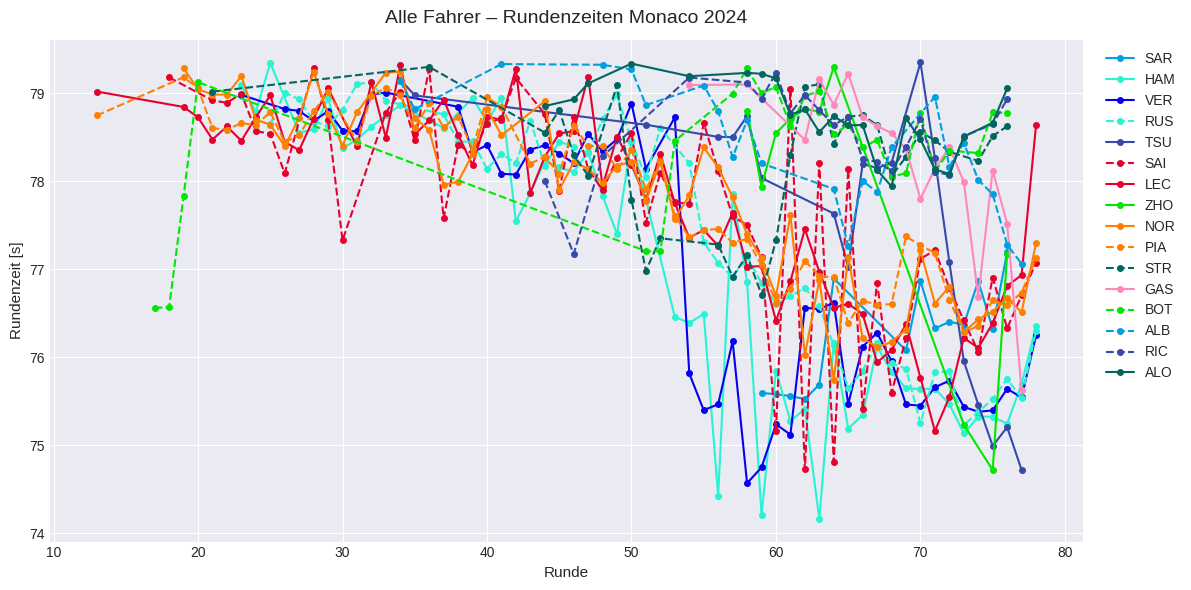

In [89]:
# Rundenzeiten in Sekunden umrechnen
laps['LapTime_sec'] = laps['LapTime'].dt.total_seconds()


# Fahrer sortieren nach durchschnittlicher Rundenzeit (für konsistente Farben/Legende)
driver_order = laps.groupby('Driver')['LapTime_sec'].mean().sort_values().index.tolist()

# Plot-Stil und Größe
plt.style.use('seaborn-v0_8-darkgrid')
rcParams['figure.figsize'] = (12, 6)

# Farben: colormap mit so vielen Farben wie Fahrer
n_drivers = len(driver_order)
cmap = plt.get_cmap('tab20', n_drivers) if n_drivers > 0 else plt.get_cmap('tab20')

# Plotten: jede Fahrerlinie etwas transparent, kleine Marker
fig, ax = plt.subplots()
for i, drv in enumerate(driver_order):
    d = laps[laps['Driver'] == drv]
    style = plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=session)
    if d.empty:
        continue
    ax.plot(d['LapNumber'], d['LapTime_sec'], marker='o', markersize=4, **style, label=drv)

# Achsen & Titel
ax.set_xlabel('Runde', fontsize=11)
ax.set_ylabel('Rundenzeit [s]', fontsize=11)
ax.set_title('Alle Fahrer – Rundenzeiten ' + session.event.Location + ' ' + str(session.date.year), fontsize=14, pad=12)

# Legende außerhalb des Plots (vermeidet Überlagerung)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False, ncol=1)

plt.tight_layout()
plt.show()


## Weather Data for Grand Prix

In [90]:
# Get weather data
weather = session.weather_data

### Temperature, Humidity, WindSpeed

                      Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:54.094000     21.1      69.0    1019.1     False       49.4   
1   0 days 00:01:54.088000     21.1      68.0    1019.1     False       49.5   
2   0 days 00:02:54.095000     21.0      68.0    1019.2     False       50.0   
3   0 days 00:03:54.083000     21.0      68.0    1019.1     False       48.3   
4   0 days 00:04:54.095000     20.9      66.0    1019.1     False       48.4   
..                     ...      ...       ...       ...       ...        ...   
195 0 days 03:15:54.885000     21.7      61.0    1018.4     False       40.6   
196 0 days 03:16:54.899000     21.8      61.0    1018.4     False       40.9   
197 0 days 03:17:54.901000     21.8      61.0    1018.4     False       40.9   
198 0 days 03:18:54.896000     21.8      62.0    1018.4     False       40.2   
199 0 days 03:19:54.900000     21.7      62.0    1018.5     False       40.3   

     WindDirection  WindSpeed  
0      

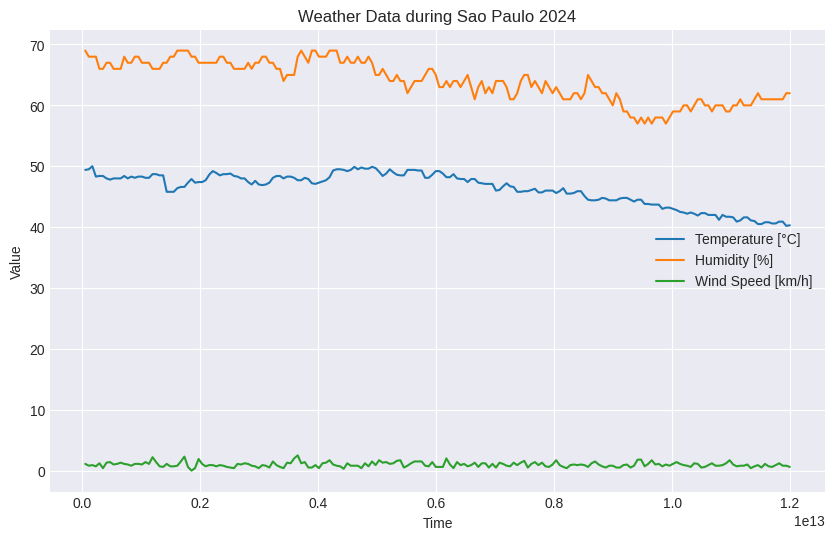

In [91]:
print(weather)
plt.figure(figsize=(10, 6))
plt.plot(weather['Time'], weather['TrackTemp'], label='Temperature [°C]')
plt.plot(weather['Time'], weather['Humidity'], label='Humidity [%]')
plt.plot(weather['Time'], weather['WindSpeed'], label='Wind Speed [km/h]')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Weather Data during ' + SESSION_NAME + ' ' + str(SESSION_YEAR))
plt.legend()
plt.show()


### Rainfall

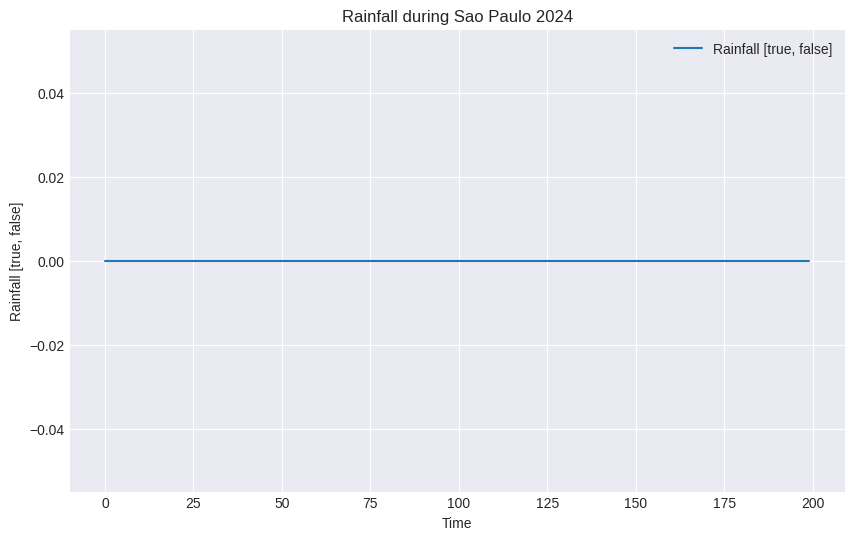

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(weather['Rainfall'], label='Rainfall [true, false]')
plt.xlabel('Time')
plt.ylabel('Rainfall [true, false]')
plt.title('Rainfall during ' + SESSION_NAME + ' ' + str(SESSION_YEAR))
plt.legend()
plt.show()

## Position changes

[Position changes during a race - FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_position_changes.html)

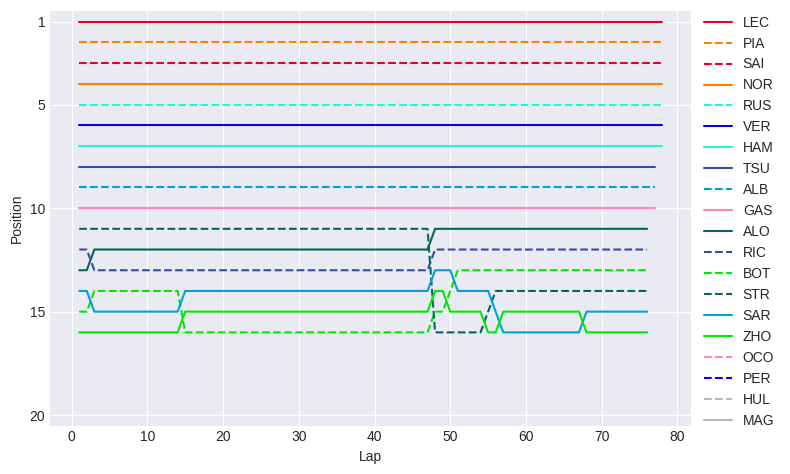

In [93]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    # skip drivers without laps (prevents .iloc[0] IndexError)
    if drv_laps.empty:
        continue

    # ensure laps are ordered by lap number before plotting
    drv_laps = drv_laps.sort_values('LapNumber')

    abb = drv_laps['Driver'].iloc[0]
    style = fastf1.plotting.get_driver_style(identifier=abb,
                                             style=['color', 'linestyle'],
                                             session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')

ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

plt.show()

## Tyre Strategy

[Tyre strategies during a race - FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_strategy.html)

In [94]:
stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
stints = stints.groupby(["Driver", "Stint", "Compound"])
stints = stints.count().reset_index()

stints = stints.rename(columns={"LapNumber": "StintLength"})
print(stints)

   Driver  Stint Compound  StintLength
0     ALB    2.0     HARD           23
1     ALO    2.0   MEDIUM           23
2     BOT    3.0     HARD           26
3     GAS    2.0   MEDIUM           18
4     HAM    2.0   MEDIUM           24
5     HAM    3.0     HARD           26
6     LEC    2.0     HARD           60
7     NOR    2.0     HARD           57
8     PIA    2.0     HARD           59
9     RIC    2.0     HARD           22
10    RUS    2.0   MEDIUM           50
11    SAI    2.0     HARD           55
12    SAR    3.0   MEDIUM           14
13    STR    2.0   MEDIUM            2
14    STR    3.0     HARD            4
15    STR    4.0     SOFT           24
16    TSU    2.0     HARD           20
17    VER    2.0   MEDIUM           23
18    VER    3.0     HARD           26
19    ZHO    2.0     HARD            7
20    ZHO    3.0     SOFT            3


### Plot Tyre Strategies

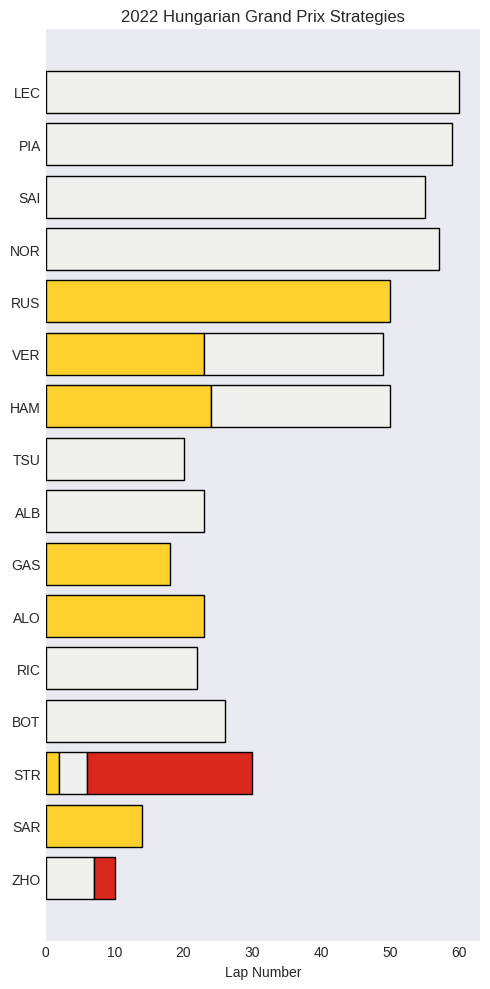

In [95]:
fig, ax = plt.subplots(figsize=(5, 10))
drivers = [session.get_driver(driver)["Abbreviation"] for driver in drivers]
for driver in drivers:
    driver_stints = stints.loc[stints["Driver"] == driver]

    previous_stint_end = 0
    for idx, row in driver_stints.iterrows():
        # each row contains the compound name and stint length
        # we can use these information to draw horizontal bars
        compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                            session=session)
        plt.barh(
            y=driver,
            width=row["StintLength"],
            left=previous_stint_end,
            color=compound_color,
            edgecolor="black",
            fill=True
        )

        previous_stint_end += row["StintLength"]

plt.title("2022 Hungarian Grand Prix Strategies")
plt.xlabel("Lap Number")
plt.grid(False)
# invert the y-axis so drivers that finish higher are closer to the top
ax.invert_yaxis()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

## Lap Time Distribution

[Driver Laptimes Distribution Visualization - FastF1](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_laptimes_distribution.html)

In [96]:
point_finishers = drivers[:10]
print(point_finishers)
driver_laps = session.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['LEC', 'PIA', 'SAI', 'NOR', 'RUS', 'VER', 'HAM', 'TSU', 'ALB', 'GAS']


In [97]:
finishing_order = [session.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['LEC', 'PIA', 'SAI', 'NOR', 'RUS', 'VER', 'HAM', 'TSU', 'ALB', 'GAS']


<Axes: xlabel='Driver', ylabel='LapTime(s)'>

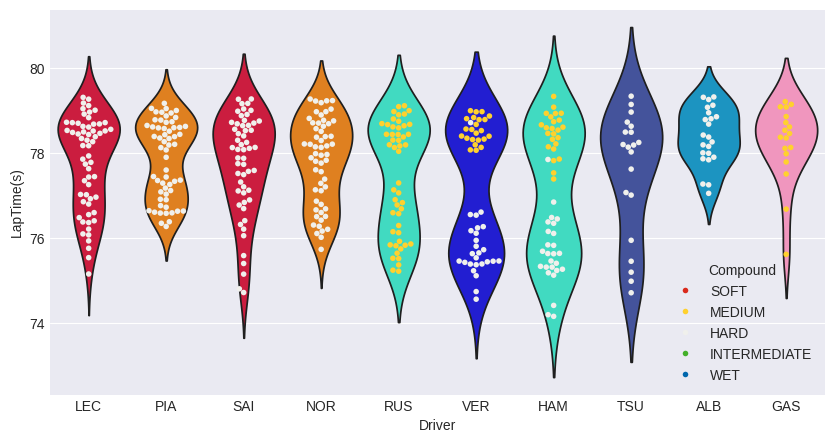

In [98]:
# create the figure
fig, ax = plt.subplots(figsize=(10, 5))

# Seaborn doesn't have proper timedelta support,
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=finishing_order,
               palette=fastf1.plotting.get_driver_color_mapping(session=session)
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=session),
              hue_order=["SOFT", "MEDIUM", "HARD", "INTERMEDIATE", "WET"],
              linewidth=0,
              size=4,
              )